In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras as keras

In [9]:
################# Configuration ############################

# The whole project will work with the setting below:

# Input library path
INPUT_FILEPATH = "/content/drive/MyDrive/Colab Notebooks/ptb/"

# Output path
# OUTPUT_FILE_PATH = ""


# Data input path
DATA_INPUT_DIR = "/content/drive/MyDrive/data/ptb/"

num_steps = 30
batch_size = 20

hidden_size = 200

num_epochs = 20



In [7]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [10]:
# import python libraries 

import sys
import os


sys.path.append(os.path.abspath(INPUT_FILEPATH))

from mgu_lib import MyGU

from train_utils import *

In [ ]:
# setting the MGU_1 (modified MGU) model

tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(10000, hidden_size, input_length=num_steps))


model.add(MyGU(hidden_size, return_sequences=True))
model.add(MyGU(hidden_size, return_sequences=True))
# if use_dropout:
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10000))
model.add(tf.keras.layers.Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.01))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 200)           2000000   
_________________________________________________________________
my_gu (MyGU)                 (None, 30, 200)           160400    
_________________________________________________________________
my_gu_1 (MyGU)               (None, 30, 200)           160400    
_________________________________________________________________
dropout (Dropout)            (None, 30, 200)           0         
_________________________________________________________________
dense (Dense)                (None, 30, 10000)         2010000   
_________________________________________________________________
activation (Activation)      (None, 30, 10000)         0         
Total params: 4,330,800
Trainable params: 4,330,800
Non-trainable params: 0
______________________________________________

In [5]:
# Loading the data set

raw_data = ptb_raw_data(DATA_INPUT_DIR)
word_to_id, id_to_word, train_data, valid_data, test_data = raw_data

vocabulary = len(word_to_id)

# # (x, y) = ptb_iterator(train_data, batch_size, num_steps)

train_data_generator = KerasBatchGenerator(train_data, num_steps, batch_size, vocabulary,
                                           skip_step=num_steps)
valid_data_generator = KerasBatchGenerator(valid_data, num_steps, batch_size, vocabulary,
                                           skip_step=num_steps)

In [ ]:
model.fit(train_data_generator.generate(),steps_per_epoch=len(train_data) // (batch_size * num_steps), epochs=num_epochs,
                        validation_data=valid_data_generator.generate(),
                        validation_steps=len(valid_data) // (batch_size * num_steps))

Epoch 1/20
1549/1549 [==============================] - 275s 176ms/step - loss: 7.1937 - val_loss: 6.7694
Epoch 2/20
1549/1549 [==============================] - 276s 178ms/step - loss: 6.8270 - val_loss: 6.4078
Epoch 3/20
1549/1549 [==============================] - 278s 179ms/step - loss: 6.5785 - val_loss: 6.2158
Epoch 4/20
1549/1549 [==============================] - 278s 179ms/step - loss: 6.3546 - val_loss: 6.1227
Epoch 5/20
1549/1549 [==============================] - 277s 179ms/step - loss: 6.2683 - val_loss: 6.0612
Epoch 6/20
1549/1549 [==============================] - 276s 178ms/step - loss: 6.2021 - val_loss: 6.0209
Epoch 7/20
1549/1549 [==============================] - 274s 177ms/step - loss: 6.1640 - val_loss: 6.0115
Epoch 8/20
1549/1549 [==============================] - 276s 178ms/step - loss: 6.1442 - val_loss: 5.9948
Epoch 9/20
1549/1549 [==============================] - 280s 181ms/step - loss: 6.1242 - val_loss: 5.9882
Epoch 10/20
1549/1549 [=======================

In [11]:
tf.keras.backend.clear_session()
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Embedding(10000, hidden_size, input_length=num_steps))


model_1.add(MyGU(hidden_size, mgu_n=False, return_sequences=True))
model_1.add(MyGU(hidden_size, mgu_n=False,return_sequences=True))
# if use_dropout:
model_1.add(tf.keras.layers.Dropout(0.2))
model_1.add(tf.keras.layers.Dense(10000))
model_1.add(tf.keras.layers.Activation('softmax'))

model_1.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.01))

print(model_1.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 200)           2000000   
_________________________________________________________________
my_gu (MyGU)                 (None, 30, 200)           160400    
_________________________________________________________________
my_gu_1 (MyGU)               (None, 30, 200)           160400    
_________________________________________________________________
dropout (Dropout)            (None, 30, 200)           0         
_________________________________________________________________
dense (Dense)                (None, 30, 10000)         2010000   
_________________________________________________________________
activation (Activation)      (None, 30, 10000)         0         
Total params: 4,330,800
Trainable params: 4,330,800
Non-trainable params: 0
______________________________________________

In [7]:
model_1.fit(train_data_generator.generate(),steps_per_epoch=len(train_data) // (batch_size * num_steps), epochs=num_epochs,
                        validation_data=valid_data_generator.generate(),
                        validation_steps=len(valid_data) // (batch_size * num_steps))

Epoch 1/20
1549/1549 [==============================] - 279s 177ms/step - loss: 7.0933 - val_loss: 6.7632
Epoch 2/20
1549/1549 [==============================] - 270s 174ms/step - loss: 6.8608 - val_loss: 6.6984
Epoch 3/20
1549/1549 [==============================] - 268s 173ms/step - loss: 6.8447 - val_loss: 6.8000
Epoch 4/20
1549/1549 [==============================] - 270s 174ms/step - loss: 6.9927 - val_loss: 6.5339
Epoch 5/20
1549/1549 [==============================] - 269s 174ms/step - loss: 6.6953 - val_loss: 6.3535
Epoch 6/20
1549/1549 [==============================] - 269s 174ms/step - loss: 6.5035 - val_loss: 6.2637
Epoch 7/20
1549/1549 [==============================] - 269s 173ms/step - loss: 6.4071 - val_loss: 6.2354
Epoch 8/20
1549/1549 [==============================] - 269s 173ms/step - loss: 6.3655 - val_loss: 6.2094
Epoch 9/20
1549/1549 [==============================] - 272s 176ms/step - loss: 6.3283 - val_loss: 6.1692
Epoch 10/20
1549/1549 [=======================

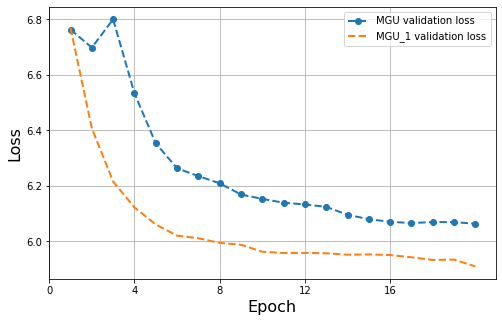

In [6]:
line1 =  [6.7632,6.6984,6.8000, 6.5339,6.3535,6.2637,6.2354,6.2094,6.1692,6.1533,
        6.1396,6.1333,6.1246,6.0962,6.0802,6.0708,6.0663,6.0699,6.0695,6.0640]

line2 =  [6.7694, 6.4078, 6.2158, 6.1227, 6.0612, 6.0209, 6.0115, 5.9948, 5.9882,
          5.9629, 5.9584, 5.9588, 5.9575, 5.9522, 5.9534, 5.9511, 5.9429, 5.9334, 5.9347, 5.9100]


# plot the figure
plt.figure(num=1,figsize=(8,5))

x1 = range(1,len(line1)+1)
x2 = range(1,len(line2)+1)


plt.plot(x1,line1,marker='o',linewidth=2,linestyle='--',label='MGU validation loss')
plt.plot(x2,line2,linewidth=2, linestyle='--', label='MGU_1 validation loss')


plt.legend(loc='best')
plt.xlabel("Epoch",fontsize=16)
plt.ylabel("Loss",fontsize=16)

plt.xticks(np.arange(0, len(line1), 4))

plt.grid()
plt.show()